In [51]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt

In [4]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.cifar10.load_data()

In [6]:
x_train.shape

(50000, 32, 32, 3)

In [11]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [19]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [20]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [38]:
def plot_sample(x,y,index):
    plt.figure(figsize=(10,1))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

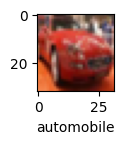

In [39]:
plot_sample(x_train,y_train,5)

In [26]:
cnn=models.Sequential([
    #CNN
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPool2D((2,2)),

    #Dense
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])


C:\Users\shibi\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [27]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [28]:
cnn.fit(x_train,y_train,epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.2199 - loss: 3.1030
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.4727 - loss: 1.4559
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.5728 - loss: 1.2189
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.6291 - loss: 1.0659
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.6620 - loss: 0.9731
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.6922 - loss: 0.8841
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.7165 - loss: 0.8152
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.7383 - loss: 0.7533
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7612 - loss: 0.6879
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.7776 - loss: 0.6388


In [33]:
cnn.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6535 - loss: 1.1707


[1.1961522102355957, 0.6484000086784363]

In [34]:
y_test=y_test.reshape(-1,)
y_test[:5]


array([3, 8, 8, 0, 6], dtype=uint8)

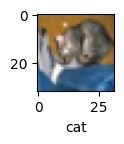

In [40]:
plot_sample(x_test,y_test,0)

In [42]:
y_pred=cnn.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [44]:
np.argmax(y_pred[0])

3

In [45]:
y_classes=[np.argmax(element) for element in y_pred]

In [46]:
y_classes[:5]

[3, 8, 8, 0, 4]

In [48]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [53]:
from sklearn.metrics import classification_report
print("classification report:",classification_report(y_test,y_classes))

classification report:               precision    recall  f1-score   support

           0       0.67      0.70      0.69      1000
           1       0.86      0.72      0.78      1000
           2       0.54      0.49      0.51      1000
           3       0.48      0.40      0.44      1000
           4       0.55      0.63      0.59      1000
           5       0.51      0.67      0.58      1000
           6       0.73      0.65      0.69      1000
           7       0.69      0.71      0.70      1000
           8       0.78      0.76      0.77      1000
           9       0.73      0.76      0.75      1000

    accuracy                           0.65     10000
   macro avg       0.65      0.65      0.65     10000
weighted avg       0.65      0.65      0.65     10000

